## -: Assessment 4 || Niladri Sekhar Sardar:-
### Retail Analysis with Walmart Data
### Analysis Tasks - Basic Statistics tasks :
### 1. Which store has maximum sales

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
from scipy import stats
# Import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
a = np.array([11, 12, 13, 14])
b = np.array([1, 2, 3, 4])
c = a - b
c

array([10, 10, 10, 10])

In [5]:
a = 9/2
b = 5.2/2
b

2.6

In [2]:
# Load dataset
rawd = pd.read_csv('Walmart_Store_sales.csv')
rawd

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
# Convert date to datetime format and show dataset information
rawd['Date'] =  pd.to_datetime(rawd['Date'])
rawd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
# checking for missing values
rawd.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
# Splitting Date and create new columns (Day, Month, and Year)
rawd["Day"]= pd.DatetimeIndex(rawd['Date']).day
rawd['Month'] = pd.DatetimeIndex(rawd['Date']).month
rawd['Year'] = pd.DatetimeIndex(rawd['Date']).year
rawd

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


<class 'numpy.float64'>


Text(0, 0.5, 'Total Sales')

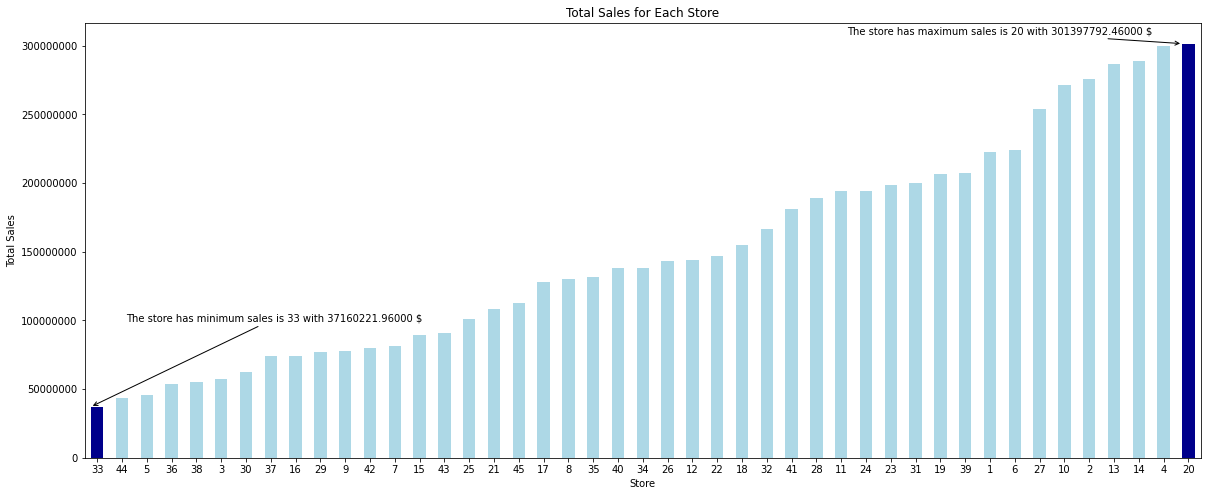

In [6]:
plt.figure(figsize=(20,8))

# Sum Weekly_Sales for each store, then sortded by total sales
total_sales_for_each_store = rawd.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array

# Assigning a specific color for the stores have the lowest and highest sales
clrs = ['lightblue' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'darkblue' for x in total_sales_for_each_store_array]

ax = total_sales_for_each_store.plot(kind='bar',color=clrs);

# store have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The store has minimum sales is 33 with {0:.5f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# store have maximum sales 
p = ax.patches[44]
ax.annotate("The store has maximum sales is 20 with {0:.5f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total Sales for Each Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')

Analysis : Clearly After looking at the plot you can infer that the Sotre 20 has maximum Weekly_Sales.

### Analysis Tasks - Basic Statistics tasks :
### 2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [7]:
cv_all = ((rawd.groupby('Store')['Weekly_Sales'].std())/(rawd.groupby('Store')['Weekly_Sales'].mean()))*100
#print(cv_all,"\n")
print("And Maximum Coefficient of variation is for the Store No. {} ".format(cv_all.idxmax()))

And Maximum Coefficient of variation is for the Store No. 35 


In [8]:
# Which store has maximum standard deviation
data_std = pd.DataFrame(rawd.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
print("The store has maximum standard deviation is "+str(data_std.head(1).index[0])+" with {0:.0f} $".format(data_std.head(1).Weekly_Sales[data_std.head(1).index[0]]))

The store has maximum standard deviation is 14 with 317570 $


#### Maximum Std is for store 14 and coefficient of variation is max for store 35, to draw more insights refer the plot

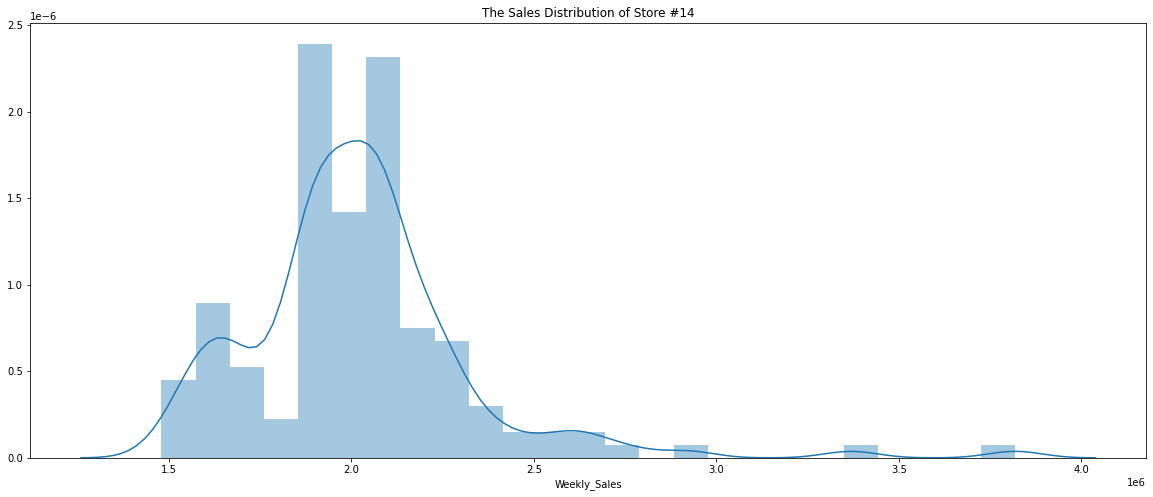

In [9]:
# Distribution of store has maximum standard deviation
plt.figure(figsize=(20,8))
sns.distplot(rawd[rawd['Store'] == data_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+ str(data_std.head(1).index[0]));

In [10]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(rawd.groupby('Store')['Weekly_Sales'].std() / rawd.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std.head(10)

,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


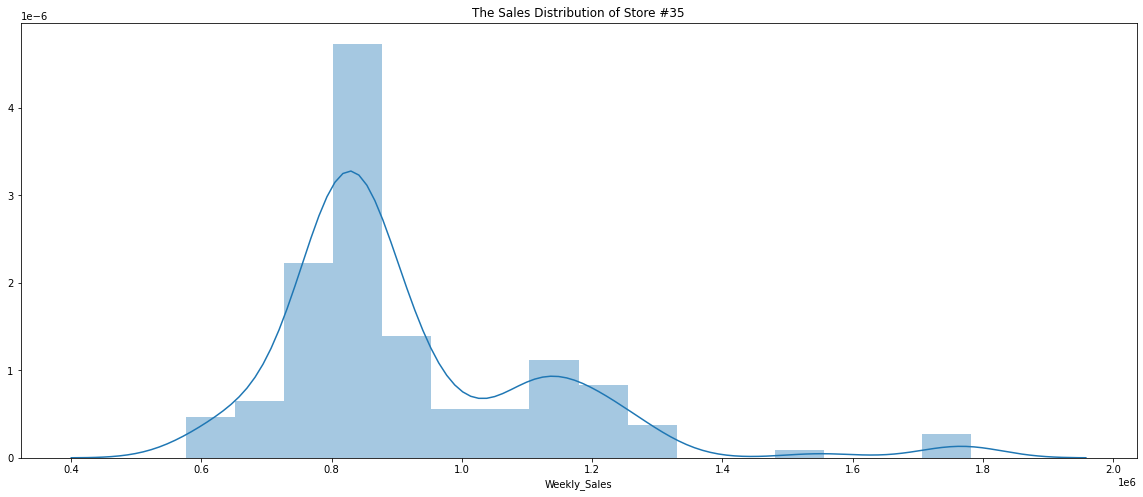

In [11]:
# Distribution of store has maximum coefficient of mean to standard deviation
coef_mean_std_max = coef_mean_std.sort_values(by='Coefficient of mean to standard deviation')
plt.figure(figsize=(20,8))
sns.distplot(rawd[rawd['Store'] == coef_mean_std_max.tail(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+str(coef_mean_std_max.tail(1).index[0]));

Analysis:
Clearly in this distribution plot for store 35 you can see how the weekly_sales are distributed, it is rightly skewed and giving the intutions that sales are centred around 800000.

<AxesSubplot:xlabel='Weekly_Sales'>

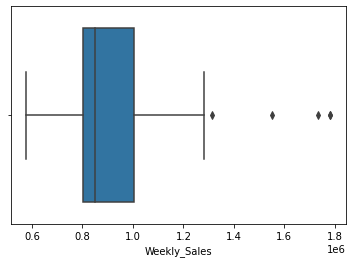

In [12]:
stores = rawd.groupby('Store')
store_35 = stores.get_group(35)
sns.boxplot(store_35.Weekly_Sales)

Analysis
This boxplot shows the weekly_sales for store 35 which has few outliers, clearly saying that it has highest coefficient of variation due to outliers as you can see in the above boxplot and distribution curve.

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

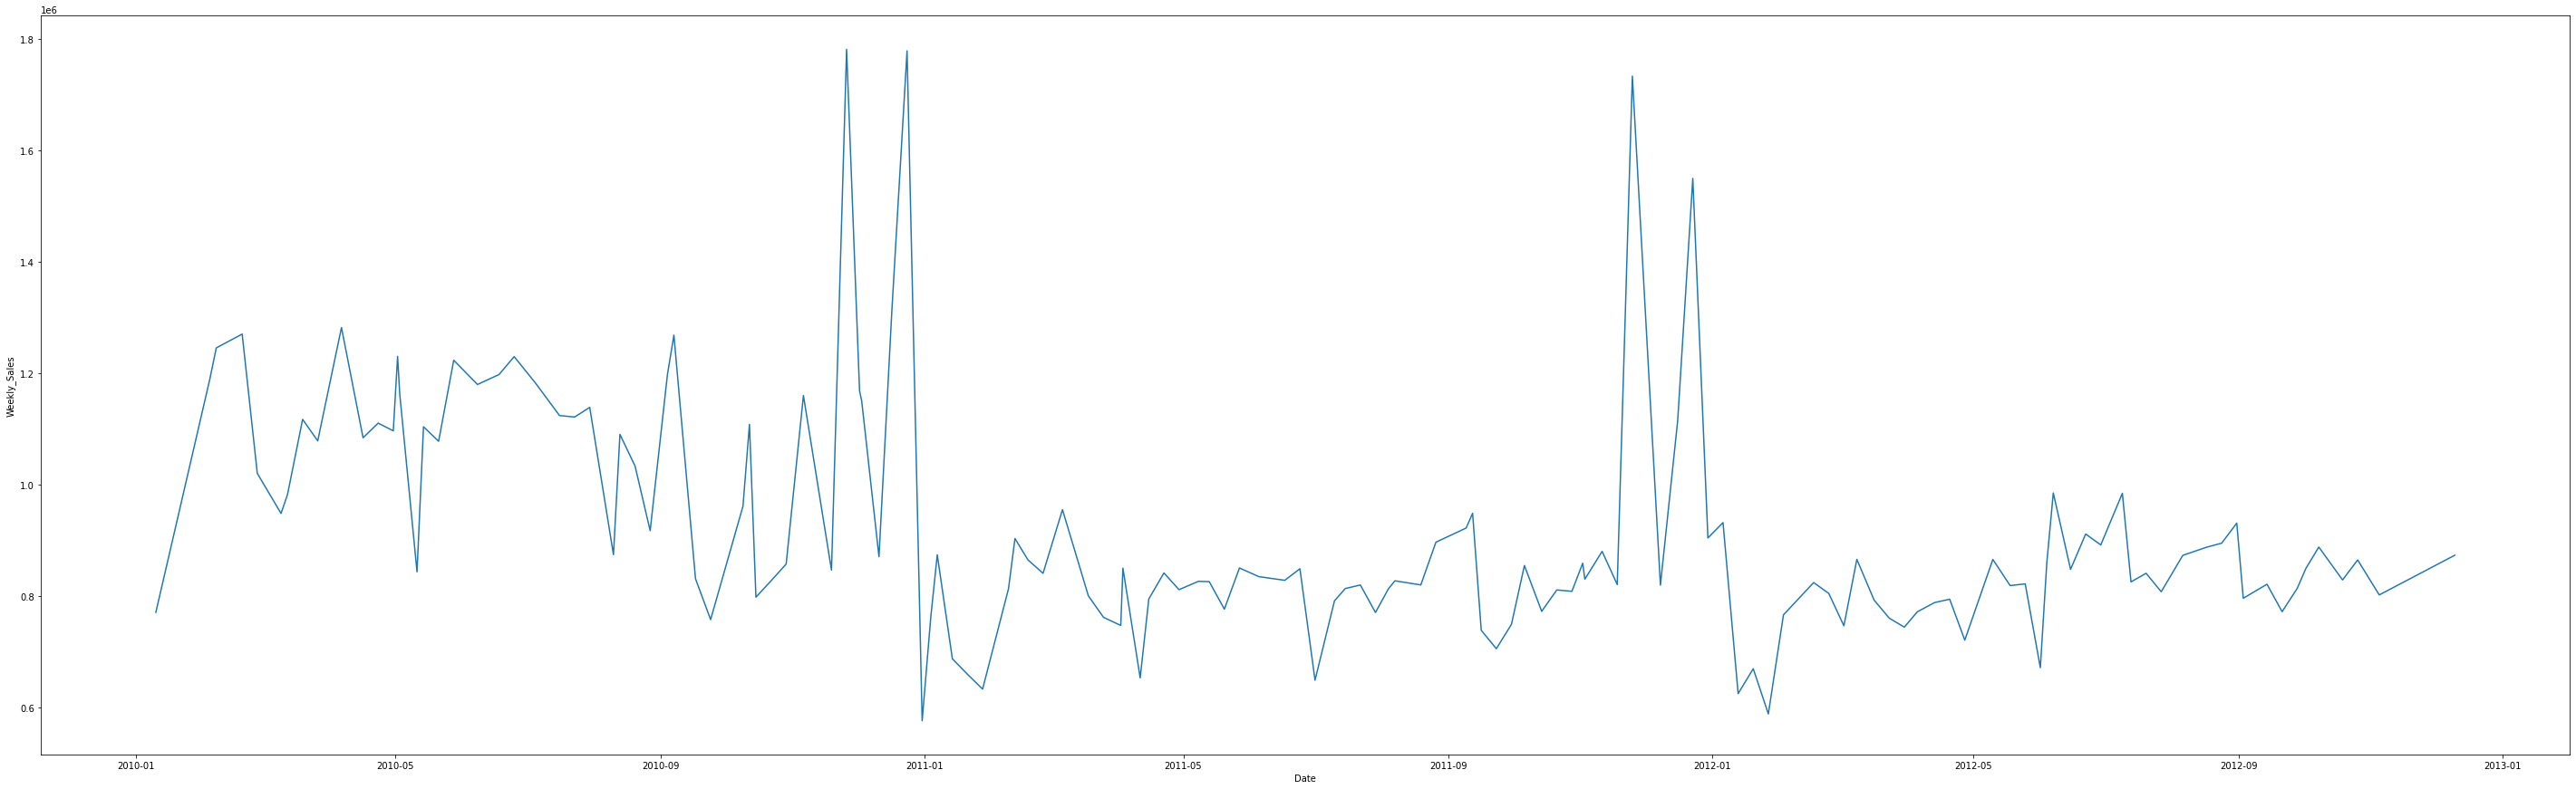

In [13]:
plt.figure(figsize=(50,15))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = store_35)

Analysis
Also now if you look at this lineplot of Weekly_Sales for store 35 it is clear that how sales are varying with during a week of a year, which is highly variable. So you can say that there is very irregular sale pattern for store 35. During the holidays only it is seeing high amount of sales. So you can infer that the store35 will be seeing high demands in products due sudden rise in sales during holiday seasons.

<AxesSubplot:xlabel='Day', ylabel='Weekly_Sales'>

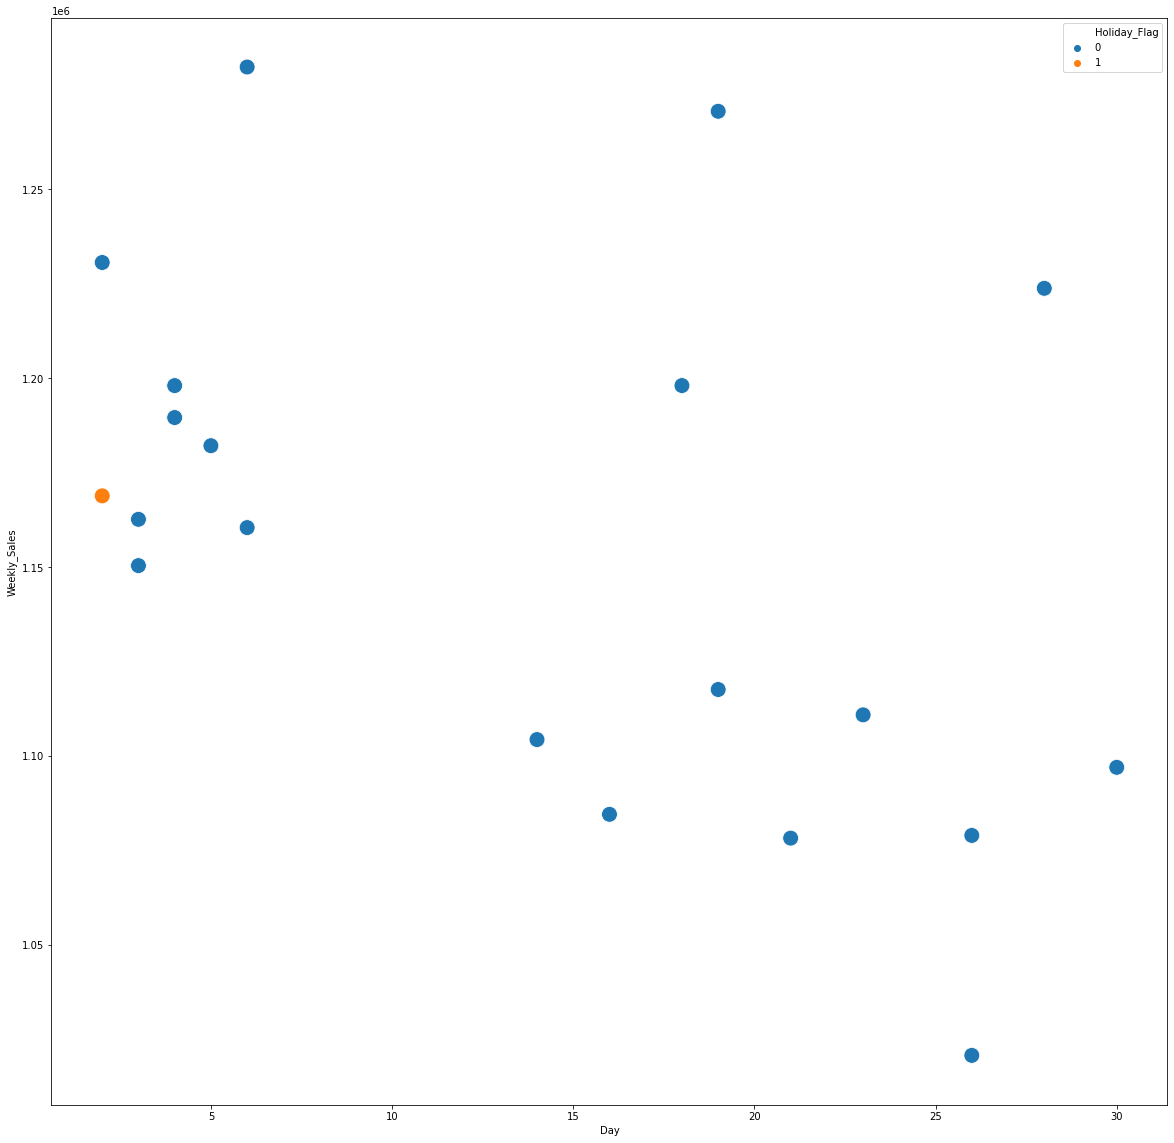

In [14]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Day', y ='Weekly_Sales', hue ='Holiday_Flag', data = store_35.head(20), s=250)

Analysis
As already infered store35 sees sudden rise of sales during holiday week, so on 5th feb, it has more demand and have high weekly_sales more than the rest of non holiday weeks.

### Analysis Tasks - Basic Statistics tasks :
### 3. Which store/s has good quarterly growth rate in Q3’2012

In [15]:
growth = rawd.copy()
growth['Date'] = pd.to_datetime(growth.Date,format='%d-%m-%Y')
growth['Year'], growth['Month'] = growth['Date'].dt.year, growth['Date'].dt.month
growth

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [16]:
# Now lets group data with year = 2012

growth_group = growth.groupby('Year',sort=False)
growth_group_2012 = growth_group.get_group(2012)
growth_group_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,1,6,2012
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,13,1,2012
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,20,1,2012
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,27,1,2012
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,2,3,2012
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [17]:
growth_group_2012_Quaters = growth_group_2012.groupby('Month')
growth_group_2012_Q1_1 = growth_group_2012_Quaters.get_group(1)
growth_group_2012_Q1_2 = growth_group_2012_Quaters.get_group(2)
growth_group_2012_Q1_3 = growth_group_2012_Quaters.get_group(3)

Quater_1 = growth_group_2012_Q1_1.append(growth_group_2012_Q1_2)
Q1 = Quater_1.append(growth_group_2012_Q1_3)
display(Q1.head())



growth_group_2012_Q2_4 = growth_group_2012_Quaters.get_group(4)
growth_group_2012_Q2_5 = growth_group_2012_Quaters.get_group(5)
growth_group_2012_Q2_6 = growth_group_2012_Quaters.get_group(6)
Quater_2 = growth_group_2012_Q2_4.append(growth_group_2012_Q2_5)
Q2 = Quater_2.append(growth_group_2012_Q2_6)
display(Q2.head())



growth_group_2012_Q3_7 = growth_group_2012_Quaters.get_group(7)
growth_group_2012_Q3_8 = growth_group_2012_Quaters.get_group(8)
growth_group_2012_Q3_9 = growth_group_2012_Quaters.get_group(9)
Quater_3 = growth_group_2012_Q3_7.append(growth_group_2012_Q3_8)
Q3 = Quater_3.append(growth_group_2012_Q3_9)
display(Q3.head())


# The last and minimum Quater ! 
growth_group_2012_Q4_10 = growth_group_2012_Quaters.get_group(10)
Q4 = growth_group_2012_Q4_10
display(Q4.head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,13,1,2012
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,20,1,2012
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,27,1,2012
121,1,2012-01-06,1624477.58,0,77.95,3.501,221.747214,7.143,6,1,2012
244,2,2012-01-13,1744725.48,0,45.99,3.261,219.532820,7.057,13,1,2012


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
114,1,2012-04-13,1621031.70,0,69.07,3.891,221.510210,7.143,13,4,2012
115,1,2012-04-20,1521577.87,0,66.76,3.877,221.564074,7.143,20,4,2012
116,1,2012-04-27,1468928.37,0,67.23,3.814,221.617937,7.143,27,4,2012
117,1,2012-04-05,1684519.99,0,75.55,3.749,221.671800,7.143,5,4,2012
257,2,2012-04-13,1935869.10,0,68.08,3.891,221.148403,6.891,13,4,2012


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,13,7,2012
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,20,7,2012
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,27,7,2012
135,1,2012-07-09,1661767.33,1,83.96,3.730,222.439015,6.908,9,7,2012
270,2,2012-07-13,1830075.13,0,80.17,3.256,221.561678,6.565,13,7,2012


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348,2,10,2012
131,1,2012-10-08,1592409.97,0,85.05,3.494,221.958433,6.908,8,10,2012
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,19,10,2012
142,1,2012-10-26,1493659.74,0,69.16,3.506,223.444251,6.573,26,10,2012
248,2,2012-10-02,2103322.68,1,46.98,3.409,219.904907,7.057,2,10,2012


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

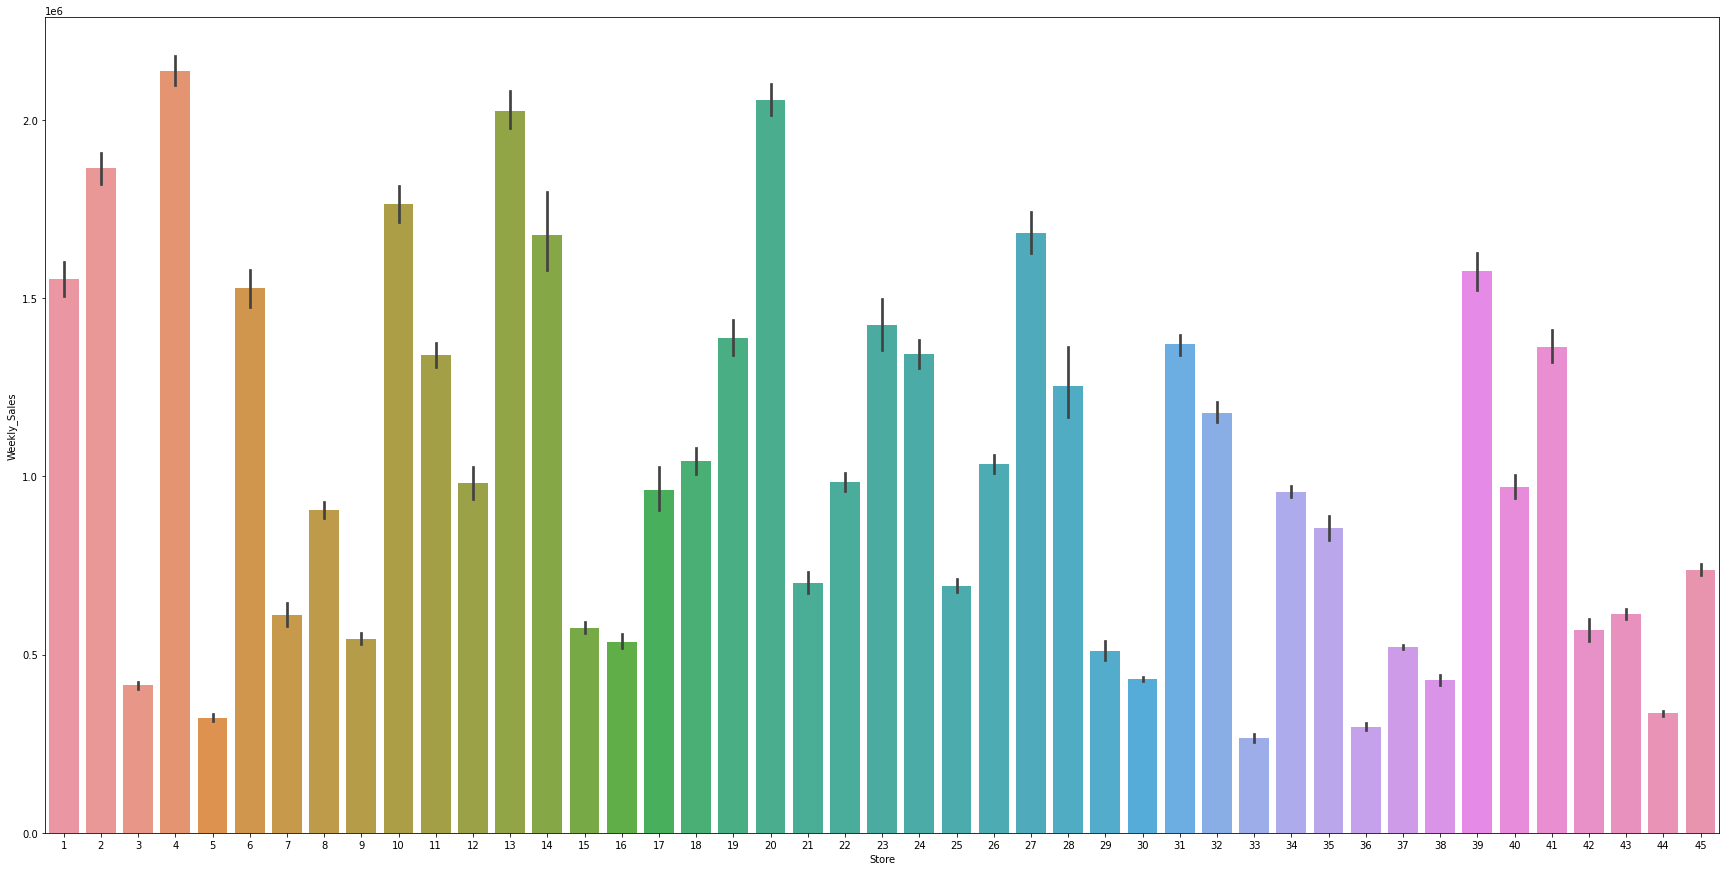

In [18]:
plt.figure(figsize=(30,15))
sns.barplot(x='Store', y = 'Weekly_Sales', data = Q3)

In [19]:
df2 = pd.DataFrame(Quater_1.groupby('Store')['Weekly_Sales'].sum())
df2["Quater1_Sales"] = pd.DataFrame(Q1.groupby('Store')['Weekly_Sales'].sum())
df2["Quater2_Sales"] = pd.DataFrame(Q2.groupby('Store')['Weekly_Sales'].sum())
df2["Quater3_Sales"] = pd.DataFrame(Q3.groupby('Store')['Weekly_Sales'].sum())
df2["Quater4_Sales"] = pd.DataFrame(Q4.groupby('Store')['Weekly_Sales'].sum())
df2.drop('Weekly_Sales', axis = 1, inplace = True)
df2['Q3 - Q2'] = df2['Quater3_Sales'] - df2['Quater2_Sales']
df2['Overall Growth Rate in 2012 Q3 %'] = (df2['Q3 - Q2']/df2['Quater2_Sales'])*100
df2['Q2 - Q1'] = df2['Quater2_Sales'] - df2['Quater1_Sales']
df2['Overall Growth Rate in 2012 Q2 %'] = (df2['Q2 - Q1']/df2['Quater1_Sales'])*100
df2.head()

,Quater1_Sales,Quater2_Sales,Quater3_Sales,Quater4_Sales,Q3 - Q2,Overall Growth Rate in 2012 Q3 %,Q2 - Q1,Overall Growth Rate in 2012 Q2 %
Store,,,,,,,,
1,18951097.69,21036965.58,18633209.98,6396615.91,-2403755.60,-11.426342,2085867.89,11.006581
2,22543946.63,25085123.61,22396867.61,7652491.40,-2688256.00,-10.716535,2541176.98,11.272103
3,4957435.81,5562668.16,4966495.93,1695049.85,-596172.23,-10.717379,605232.35,12.208577
4,25659307.85,28384185.16,25652119.35,8814889.64,-2732065.81,-9.625310,2724877.31,10.619450
5,3912829.61,4427262.21,3880621.88,1288908.50,-546640.33,-12.347142,514432.60,13.147329


In [20]:
print("The Store which has good growth in Quater 3 in 2012 is : ")
display(df2['Overall Growth Rate in 2012 Q3 %'].idxmax())

The Store which has good growth in Quater 3 in 2012 is : 


16

<AxesSubplot:xlabel='Store', ylabel='Overall Growth Rate in 2012 Q3 %'>

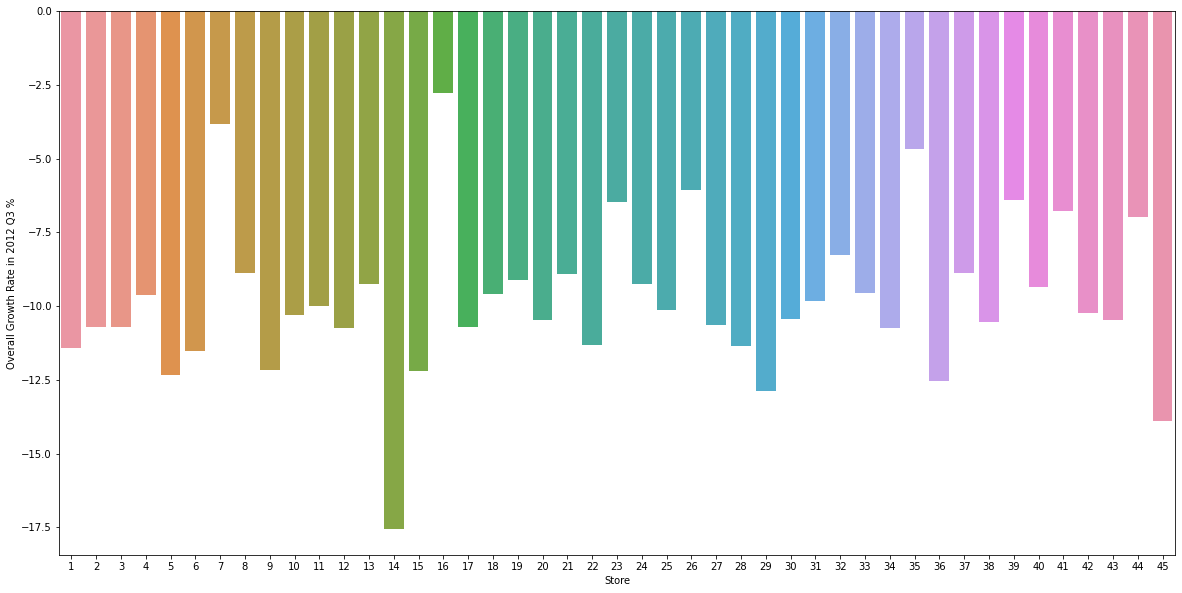

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x=df2.index, y = 'Overall Growth Rate in 2012 Q3 %', data = df2)

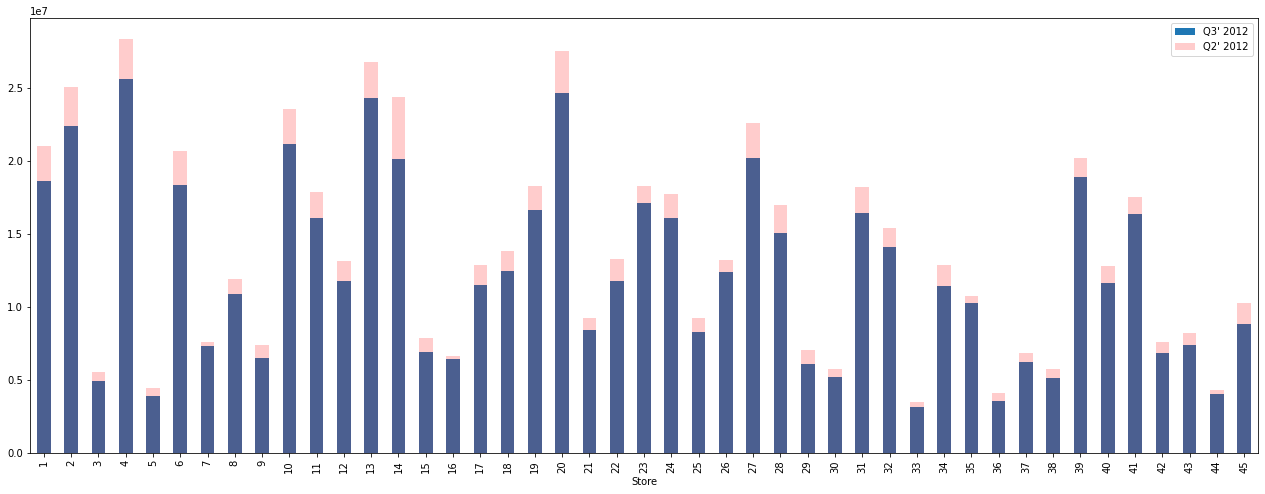

In [22]:
plt.figure(figsize=(22,8))

# Sales for third quarterly in 2012
Q3 = rawd[(rawd['Date'] > '2012-07-01') & (rawd['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Sales for second quarterly in 2012
Q2 = rawd[(rawd['Date'] > '2012-04-01') & (rawd['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()

# Plotting the difference between sales for second and third quarterly
Q2.plot(ax=Q3.plot(kind='bar',legend=True),kind='bar',color='r',alpha=0.2,legend=True);
plt.legend(["Q3' 2012", "Q2' 2012"]);

In [23]:
# store/s has good quarterly growth rate in Q3’2012 
print('Store have good quarterly growth rate in Q3’2012 is Store '+str(Q3.idxmax())+' With '+str(Q3.max())+' $')

Store have good quarterly growth rate in Q3’2012 is Store 4 With 25652119.35 $


### Analysis Tasks - Basic Statistics tasks :
### :- Holiday Events -:

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
### 4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [24]:
data1=rawd.copy()
data1['Date'] = pd.to_datetime(data1.Date, format = '%d-%m-%Y')
data1['Year'], data1['Month'] = data1['Date'].dt.year, data1['Date'].dt.month
holiday_group = data1.groupby('Holiday_Flag',sort=False)
holiday_week = holiday_group.get_group(1)
display(holiday_week.shape)
display(holiday_week.info())
display(holiday_week.describe())
display(holiday_week.head(6))

(450, 11)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 1 to 6427
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         450 non-null    int64         
 1   Date          450 non-null    datetime64[ns]
 2   Weekly_Sales  450 non-null    float64       
 3   Holiday_Flag  450 non-null    int64         
 4   Temperature   450 non-null    float64       
 5   Fuel_Price    450 non-null    float64       
 6   CPI           450 non-null    float64       
 7   Unemployment  450 non-null    float64       
 8   Day           450 non-null    int64         
 9   Month         450 non-null    int64         
 10  Year          450 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 42.2 KB


None

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,450.000000,4.500000e+02,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,23.000000,1.122888e+06,1.0,50.232044,3.227464,171.268092,8.074127,14.500000,10.500000,2010.800000
std,13.001627,6.276849e+05,0.0,20.071118,0.407934,39.291449,1.879293,11.477925,1.501669,0.749164
min,1.000000,2.153592e+05,1.0,10.240000,2.513000,126.114581,4.077000,2.000000,7.000000,2010.000000
25%,12.000000,5.758655e+05,1.0,33.367500,2.943000,131.586613,7.015000,2.000000,10.000000,2010.000000
50%,23.000000,1.018538e+06,1.0,47.870000,3.179000,182.598178,7.890000,9.000000,11.000000,2011.000000
75%,34.000000,1.555213e+06,1.0,67.335000,3.546000,211.760416,8.625000,26.000000,12.000000,2011.000000
max,45.000000,3.004702e+06,1.0,96.220000,4.124000,226.210354,14.313000,31.000000,12.000000,2012.000000


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,9,10,2010
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,26,11,2010
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,31,12,2010
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2,11,2011
83,1,2011-09-09,1540471.24,1,76.00,3.546,215.861056,7.962,9,9,2011


In [25]:
#Plotting Weekly_Sales of Holiday_Week against Non_Holiday_Week. To get more insights out of the data
non_holiday_week = holiday_group.get_group(0)
non_holiday_week.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,3,12,2010


<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

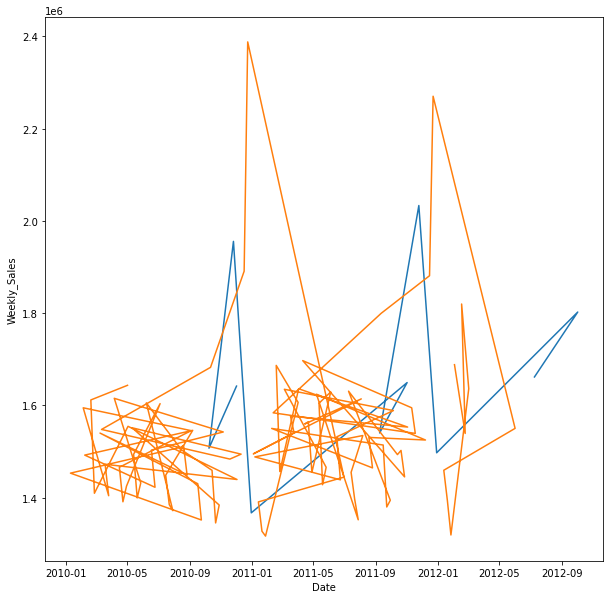

In [26]:

plt.figure(figsize=(10,10))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = holiday_week.head(10), sort=False)
sns.lineplot(x='Date', y = 'Weekly_Sales', data = non_holiday_week.head(100), sort = False)

In [27]:
v=holiday_week.groupby(['Month', 'Year'],sort=False)['Weekly_Sales'].mean()
v1 = pd.DataFrame(v)
v1

Weekly_Sales
Month Year              
12    2010  9.863244e+05
10    2010  1.014098e+06
11    2010  1.462689e+06
      2011  1.265887e+06
9     2011  1.039183e+06
12    2011  1.023166e+06
10    2012  1.111320e+06
7     2012  1.074001e+06

In [28]:
val = non_holiday_week.groupby(['Month', 'Year'],sort=False)['Weekly_Sales'].mean()
val1 = pd.DataFrame(val)
val1.head()

,,Weekly_Sales
Month,Year,
5,2010,1.039303e+06
2,2010,1.064372e+06
12,2010,1.304458e+06
3,2010,1.034590e+06
9,2010,9.983559e+05


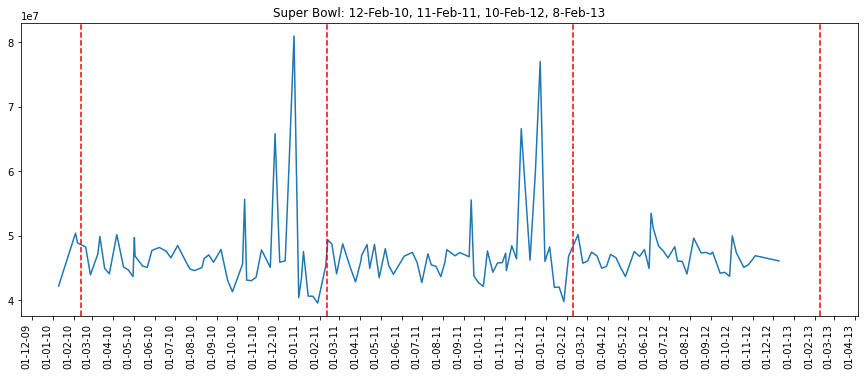

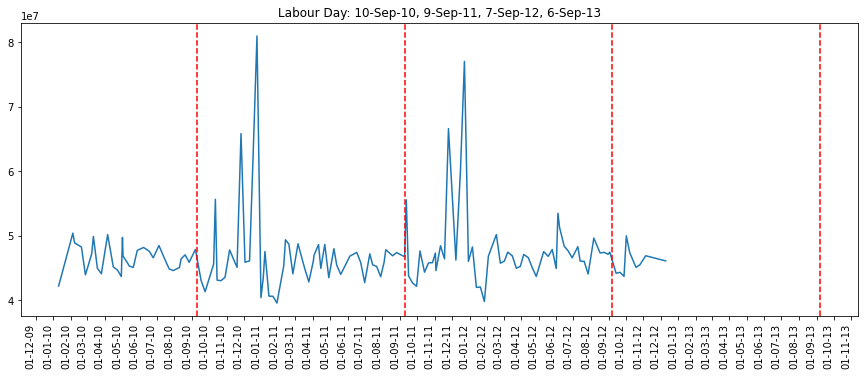

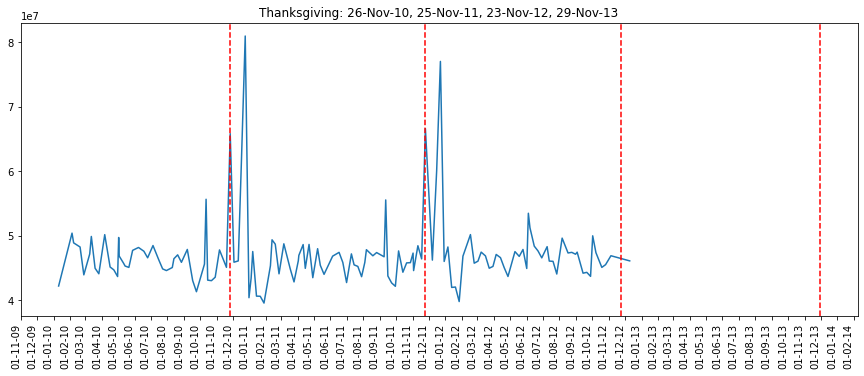

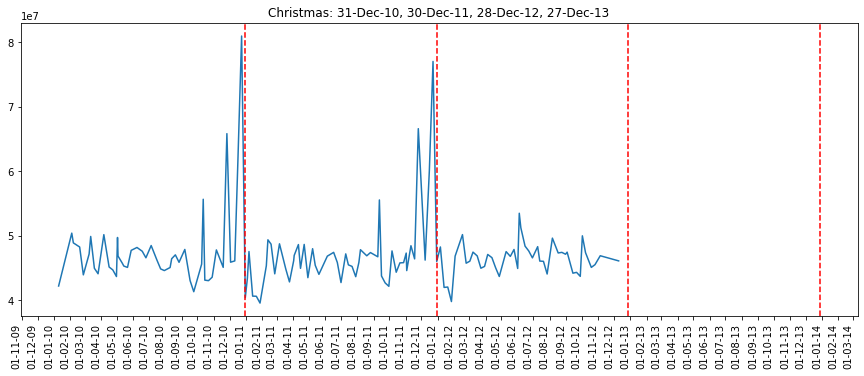

In [29]:
def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,6))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = rawd.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012', '8-2-2013']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012', '6-9-2013']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']
    
plot_line(total_sales,Super_Bowl,'Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13')
plot_line(total_sales,Labour_Day,'Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13')
plot_line(total_sales,Thanksgiving,'Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13')
plot_line(total_sales,Christmas,'Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13')

In [30]:
rawd.loc[rawd.Date.isin(Super_Bowl)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2,11,2011
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348,2,10,2012
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324,2,12,2010
196,2,2011-11-02,2168041.61,1,33.19,3.022,212.592862,8.028,2,11,2011
...,...,...,...,...,...,...,...,...,...,...,...
6202,44,2011-11-02,307486.73,1,30.83,3.034,127.859129,7.224,2,11,2011
6254,44,2012-10-02,325377.97,1,33.73,3.116,130.384903,5.774,2,10,2012
6293,45,2010-12-02,656988.64,1,27.73,2.773,181.982317,8.992,2,12,2010
6345,45,2011-11-02,766456.00,1,30.30,3.239,183.701613,8.549,2,11,2011


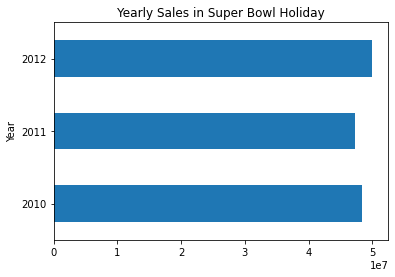

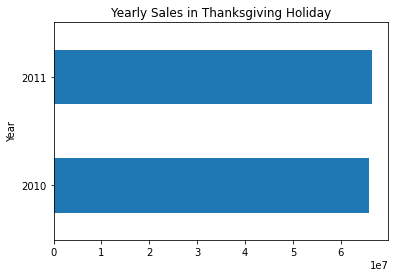

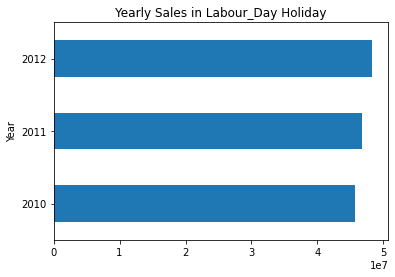

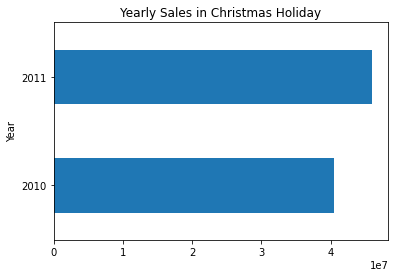

In [31]:
# Yearly Sales in holidays
Super_Bowl_df = pd.DataFrame(rawd.loc[rawd.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df = pd.DataFrame(rawd.loc[rawd.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(rawd.loc[rawd.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df = pd.DataFrame(rawd.loc[rawd.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())

Super_Bowl_df.plot(kind='barh',legend=False,title='Yearly Sales in Super Bowl Holiday')
Thanksgiving_df.plot(kind='barh',legend=False,title='Yearly Sales in Thanksgiving Holiday') 
Labour_Day_df.plot(kind='barh',legend=False,title='Yearly Sales in Labour_Day Holiday')
Christmas_df.plot(kind='barh',legend=False,title='Yearly Sales in Christmas Holiday');


# 

### Analysis Tasks - Basic Statistics tasks :
### 5. Provide a monthly and semester view of sales in units and give insights


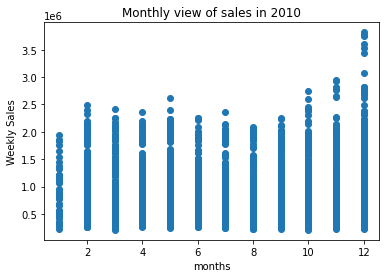

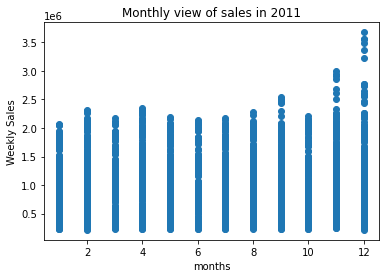

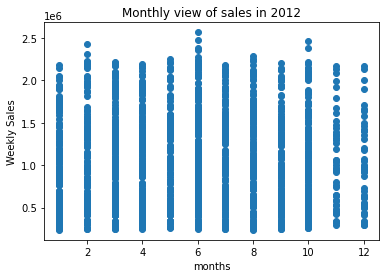

In [32]:

# Monthly view of sales for each years
plt.scatter(rawd[rawd.Year==2010]["Month"],rawd[rawd.Year==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.scatter(rawd[rawd.Year==2011]["Month"],rawd[rawd.Year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.scatter(rawd[rawd.Year==2012]["Month"],rawd[rawd.Year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()


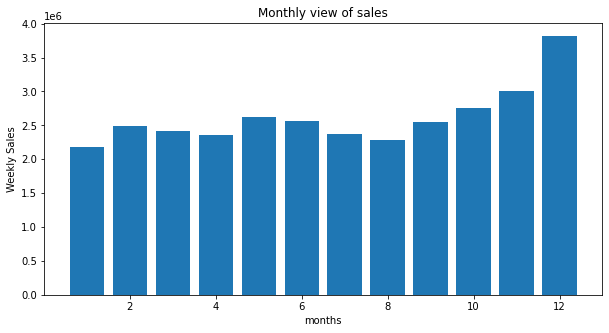

In [33]:
# Monthly view of sales for all years
plt.figure(figsize=(10,5))
plt.bar(rawd["Month"],rawd["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales");

In [34]:
rawd['quarter'] = rawd['Date'].dt.quarter
rawd['Semester'] = np.where(rawd.quarter.isin([1,2]),1,2)
rawd[['Date','Semester']].head(10)

,Date,Semester
0,2010-05-02,1
1,2010-12-02,2
2,2010-02-19,1
3,2010-02-26,1
4,2010-05-03,1
5,2010-12-03,2
6,2010-03-19,1
7,2010-03-26,1
8,2010-02-04,1
9,2010-09-04,2


<Figure size 720x504 with 0 Axes>

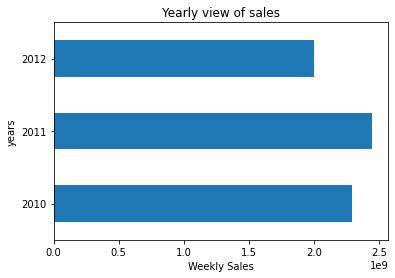

In [35]:
# Semester view of sales

plt.figure(figsize=(10,7));
rawd.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='barh',legend=False);
plt.xlabel("Weekly Sales")
plt.ylabel("years")
plt.title("Yearly view of sales");

### Month and Sem Wise Sales in 2010

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

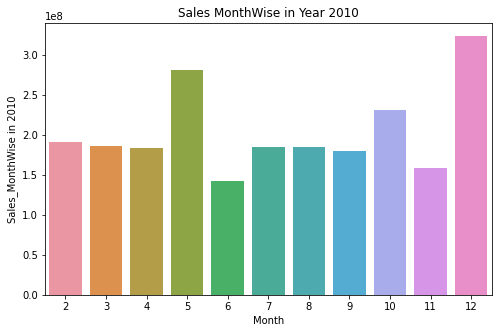

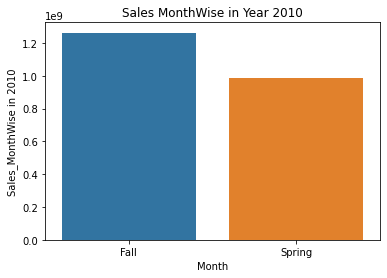

<Figure size 432x288 with 0 Axes>

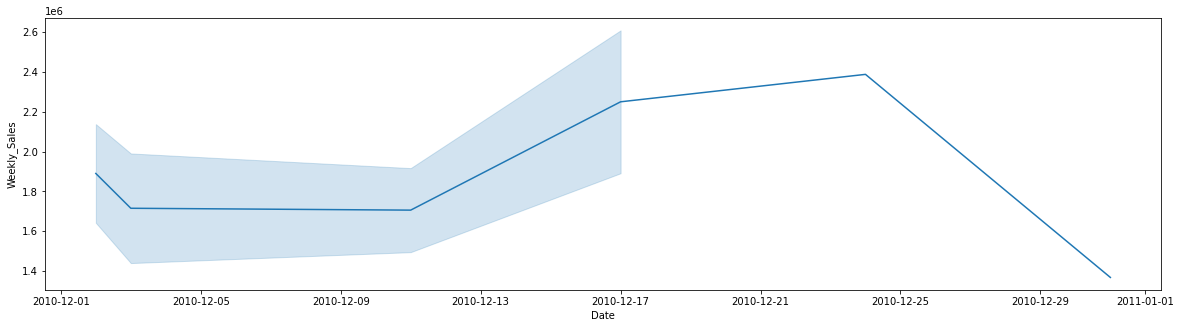

<Figure size 432x288 with 0 Axes>

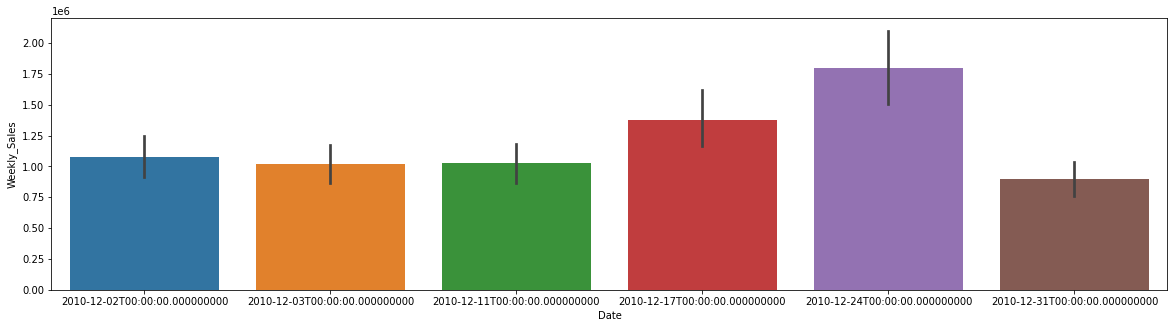

In [36]:
#MonthWise

groups = growth.groupby('Year')[['Month','Store', 'Weekly_Sales', 'Date']]
group2010 = groups.get_group(2010)
gr = group2010.groupby('Month')
month_2010 = [2,3,4,5,6,7,8,9,10,11,12]
sale_monthWise = []

for i in month_2010:
    val = gr.get_group(i)['Weekly_Sales'].sum()
    sale_monthWise.append(val)
 
month_fallSem  = [7,8,9,10,11,12]
month_springsem = [2,3,4,5,6]
total_spring = sum(sale_monthWise[0:5])
total_fall   = sum(sale_monthWise[5:])
semwise =[total_fall,total_spring]
semval = ['Fall', 'Spring']

plt.figure(figsize=(8,5))
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2010")
plt.title('Sales MonthWise in Year 2010')
sns.barplot(x=month_2010,y=sale_monthWise)
plt.figure()
sns.barplot(x=semval, y = semwise)
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2010")
plt.title('Sales MonthWise in Year 2010')
plt.figure()

#Grouping by month 12 to analyse more which date has more weekly_Sales.
group2010Months = group2010.groupby('Month')[['Weekly_Sales', 'Store', 'Date']]
group2010month12 = group2010Months.get_group(12)
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = group2010month12.head(10))
plt.figure()
plt.figure(figsize=(20,5))
sns.barplot(x='Date', y = 'Weekly_Sales', data = group2010month12)

### Month and Sem Wise Sales in 2011

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

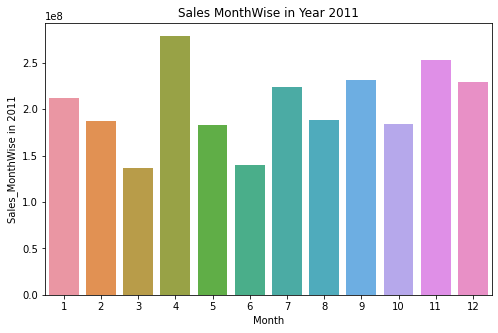

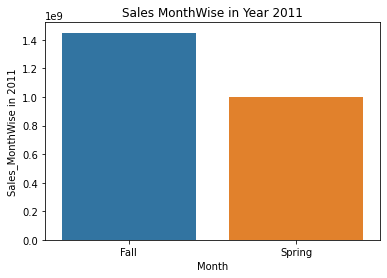

<Figure size 432x288 with 0 Axes>

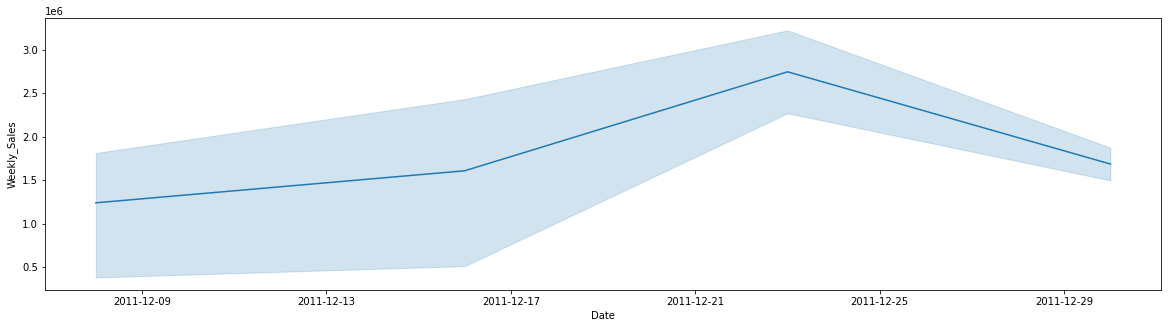

<Figure size 432x288 with 0 Axes>

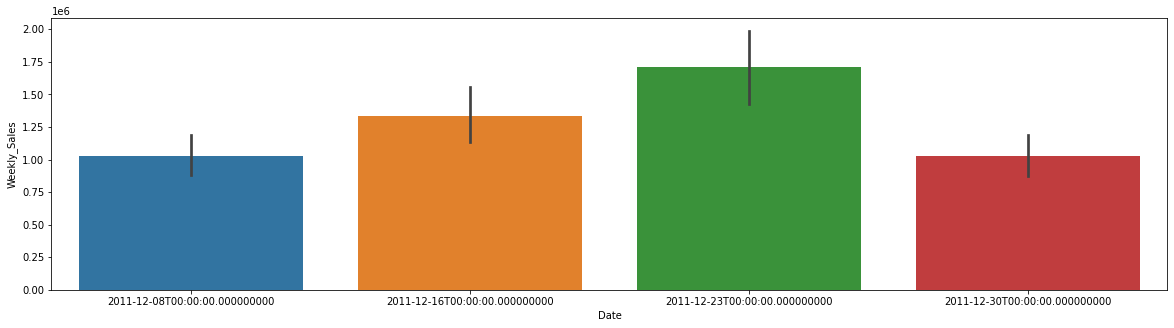

In [37]:
#MonthWise

groups = growth.groupby('Year')[['Month','Store', 'Weekly_Sales', 'Date']]
group2011 = groups.get_group(2011)
gr = group2011.groupby('Month')
month_2011 = [1,2,3,4,5,6,7,8,9,10,11,12]
sale_monthWise = []

for i in month_2011:
    val = gr.get_group(i)['Weekly_Sales'].sum()
    sale_monthWise.append(val)
 
month_fallSem  = [7,8,9,10,11,12]
month_springsem = [1,2,3,4,5,6]
total_spring = sum(sale_monthWise[0:5])
total_fall   = sum(sale_monthWise[5:])
semwise =[total_fall,total_spring]
semval = ['Fall', 'Spring']

plt.figure(figsize=(8,5))
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2011")
plt.title('Sales MonthWise in Year 2011')
sns.barplot(x=month_2011,y=sale_monthWise)
plt.figure()
sns.barplot(x=semval, y = semwise)
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2011")
plt.title('Sales MonthWise in Year 2011')
plt.figure()

#Grouping by month 12 to analyse more which date has more weekly_Sales.
group2011Months = group2011.groupby('Month')[['Weekly_Sales', 'Store', 'Date']]
group2011month12 = group2011Months.get_group(12)
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = group2011month12.head(10))
plt.figure()
plt.figure(figsize=(20,5))
sns.barplot(x='Date', y = 'Weekly_Sales', data = group2011month12)

### Month and Sem Wise Sales in 2012

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

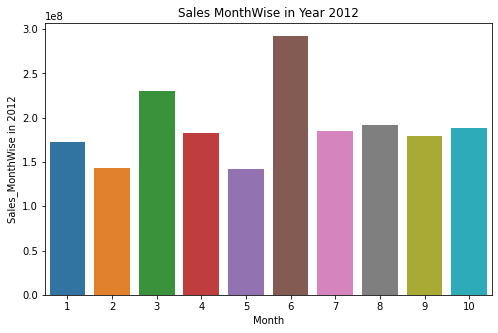

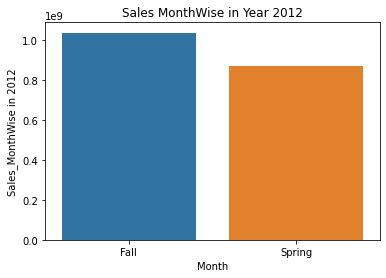

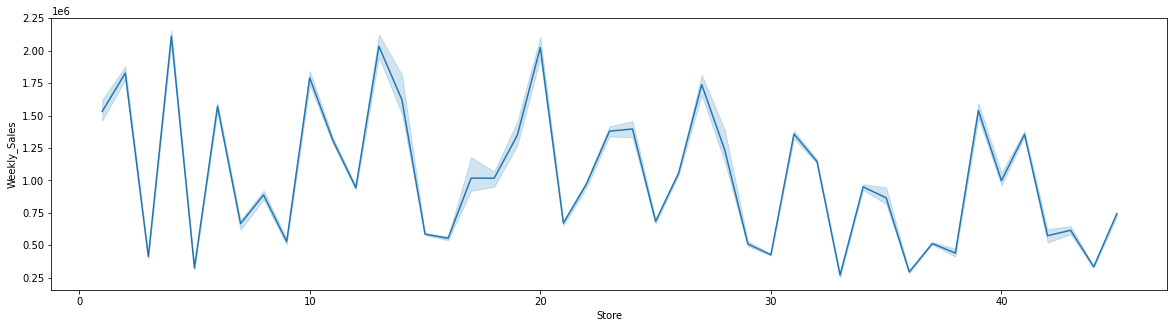

<Figure size 432x288 with 0 Axes>

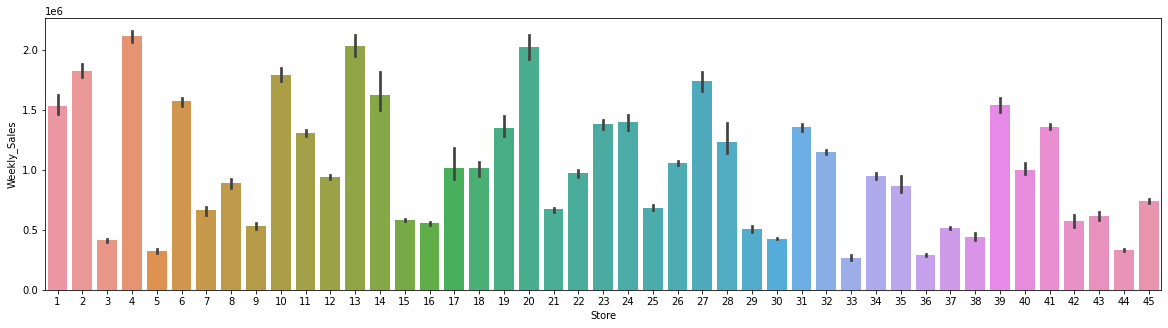

In [38]:
#MonthWise

groups = growth.groupby('Year')[['Month','Store', 'Weekly_Sales', 'Date']]
group2012 = groups.get_group(2012)
gr = group2012.groupby('Month')
month_2012 = [1,2,3,4,5,6,7,8,9,10]
sale_monthWise = []

for i in month_2012:
    val = gr.get_group(i)['Weekly_Sales'].sum()
    sale_monthWise.append(val)
 
month_fallSem  = [7,8,9,10]
month_springsem = [1,2,3,4,5,6]
total_spring = sum(sale_monthWise[0:5])
total_fall   = sum(sale_monthWise[5:])
semwise =[total_fall,total_spring]
semval = ['Fall', 'Spring']

plt.figure(figsize=(8,5))
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2012")
plt.title('Sales MonthWise in Year 2012')
sns.barplot(x=month_2012,y=sale_monthWise)
plt.figure()
sns.barplot(x=semval, y = semwise)
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2012")
plt.title('Sales MonthWise in Year 2012')

#Grouping by month 7 to analyse more which date has more weekly_Sales.
group2012Months = group2012.groupby('Month')[['Weekly_Sales', 'Store', 'Date']]
group2012month7 = group2012Months.get_group(7)
plt.figure(figsize=(20,5))
sns.lineplot(x='Store', y = 'Weekly_Sales', data = group2012month7)
plt.figure()
plt.figure(figsize=(20,5))
sns.barplot(x='Store', y = 'Weekly_Sales', data = group2012month7)


### Statistical Model

### For Store 1 – Build  prediction models to forecast demand
#### 1. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

#### 2. Change dates into days by creating new variable.

In [39]:
import sys
hypothesis = rawd.groupby('Store')[['Fuel_Price','Unemployment', 'CPI','Weekly_Sales', 'Holiday_Flag']]
factors  = hypothesis.get_group(1)
day_arr = [1]
for i in range (1,len(factors)):
    day_arr.append(i*7)
    
factors['Days'] = day_arr.copy()
factors

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Fuel_Price,Unemployment,CPI,Weekly_Sales,Holiday_Flag,Days
0,2.572,8.106,211.096358,1643690.90,0,1
1,2.548,8.106,211.242170,1641957.44,1,7
2,2.514,8.106,211.289143,1611968.17,0,14
3,2.561,8.106,211.319643,1409727.59,0,21
4,2.625,8.106,211.350143,1554806.68,0,28
...,...,...,...,...,...,...
138,3.666,6.908,222.981658,1437059.26,0,966
139,3.617,6.573,223.181477,1670785.97,0,973
140,3.601,6.573,223.381296,1573072.81,0,980
141,3.594,6.573,223.425723,1508068.77,0,987


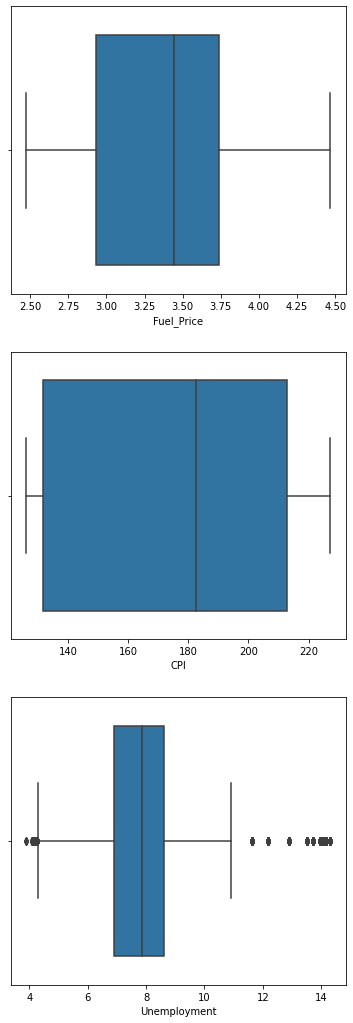

In [40]:
# find outliers 
fig, axs = plt.subplots(3, figsize=(6,18))
X = rawd[['Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(rawd[column], ax=axs[i])


In [41]:
data_new = rawd[(rawd['Unemployment']<10) & (rawd['Unemployment']>4.5) & (rawd['Temperature']>10)]
data_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,quarter,Semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,2,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,4,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,1,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,1,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,3,2
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012,2,1
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012,4,2
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,4,2


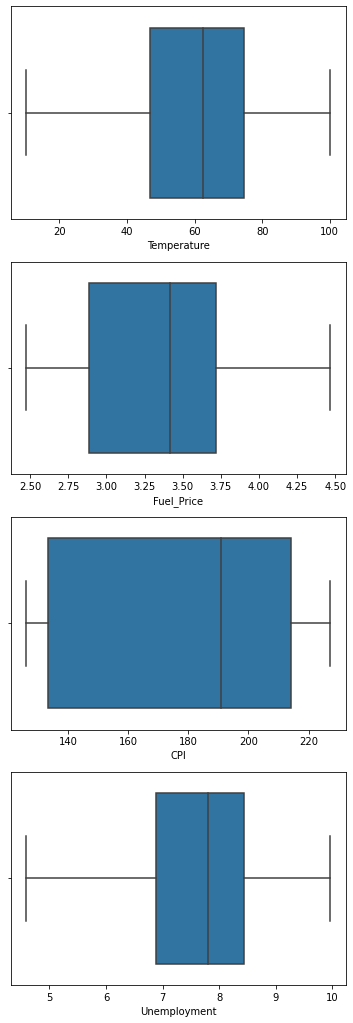

In [42]:
# check outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = data_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data_new[column], ax=axs[i])

In [43]:
# Select features and target 
X = data_new[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = data_new['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Linear Regression:

Accuracy: 12.842893613429796
Mean Absolute Error: 438663.16828939016
Mean Squared Error: 276623498945.90753
Root Mean Squared Error: 525950.0916873269


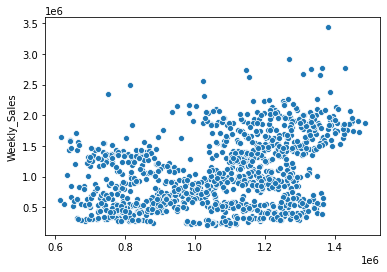

In [44]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test);

Random Forest Regressor:

Accuracy: 95.17381842261965
Mean Absolute Error: 64782.42220015459
Mean Squared Error: 15326478525.284197
Root Mean Squared Error: 123800.15559474955


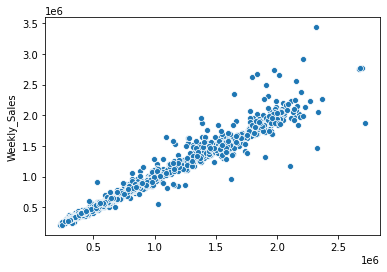

In [45]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test);

<AxesSubplot:>

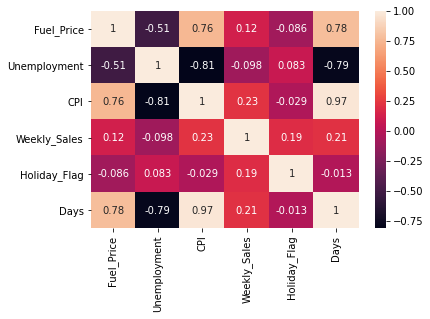

In [46]:
sns.heatmap(factors.corr(), annot = True)

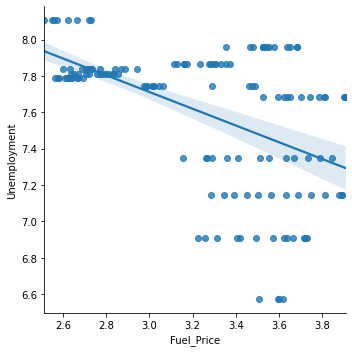

<Figure size 432x288 with 0 Axes>

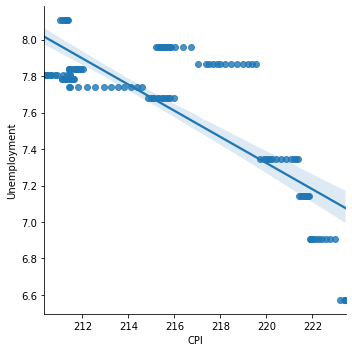

In [47]:
sns.lmplot(x='Fuel_Price', y = 'Unemployment', data = factors)
plt.figure()
sns.lmplot(x='CPI', y = 'Unemployment', data = factors)

### Hypothesis Testing - CPI

3.106725927640744e-144
reject null hypothesis


<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

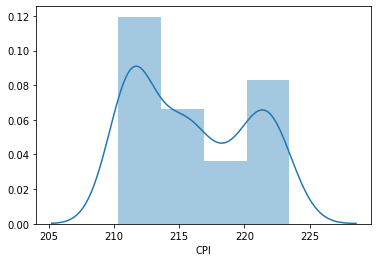

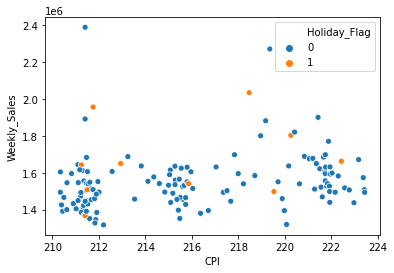

<Figure size 432x288 with 0 Axes>

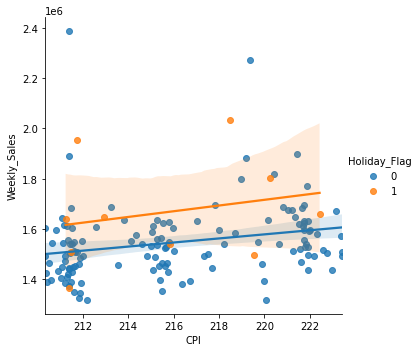

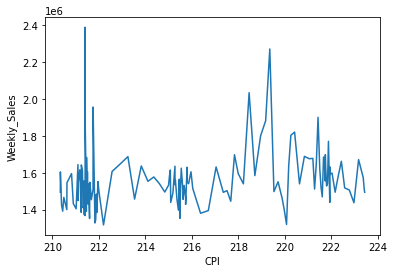

In [48]:
#Hypothesis Testing - CPI
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['CPI'])
sns.distplot(factors.CPI)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lmplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lineplot(x='CPI', y = 'Weekly_Sales', data = factors)

### Hypothesis Testing - Fuel_Price

3.050079726743709e-144
reject null hypothesis


<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

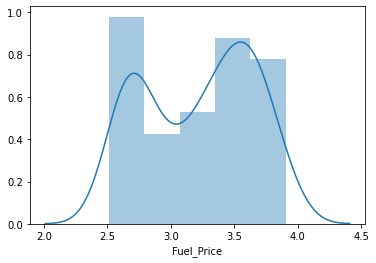

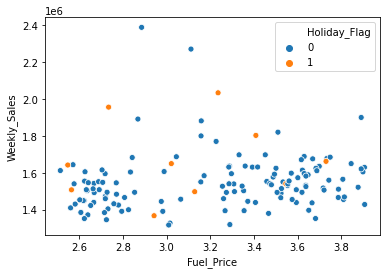

<Figure size 432x288 with 0 Axes>

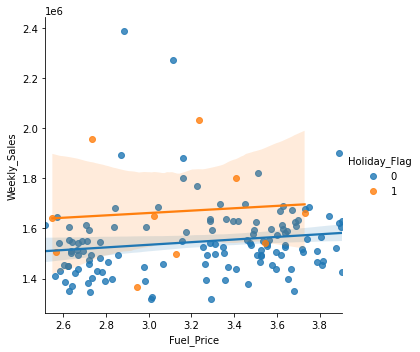

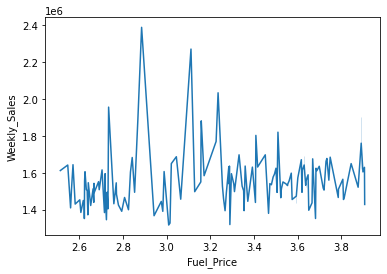

In [49]:
#Hypothesis Testing - Fuel_Price
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Fuel_Price'])
sns.distplot(factors.Fuel_Price)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lmplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lineplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors)

### Hypothesis Testing - Uneployment

3.0515405336011733e-144
reject null hypothesis


<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

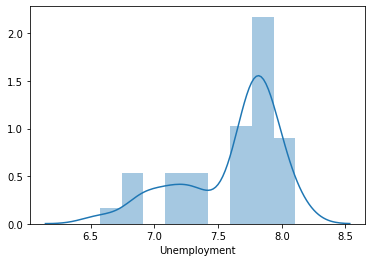

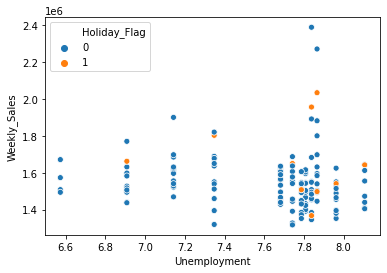

<Figure size 432x288 with 0 Axes>

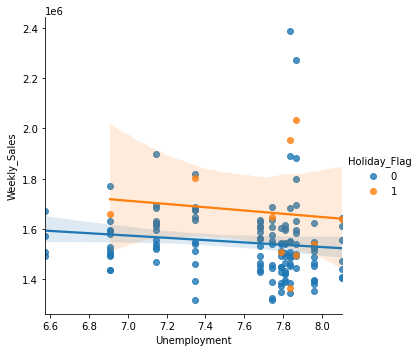

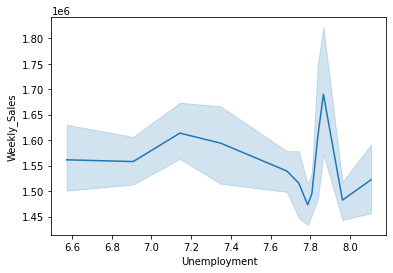

In [50]:
#Hypothesis Testing - Uneployment
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Unemployment'])
sns.distplot(factors.Unemployment)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lmplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lineplot(x='Unemployment', y = 'Weekly_Sales', data = factors)

## Plotting Weekly_sales day wise for store 1, by keeping holidays as a parameter to get more insights.

<AxesSubplot:xlabel='Days', ylabel='Weekly_Sales'>

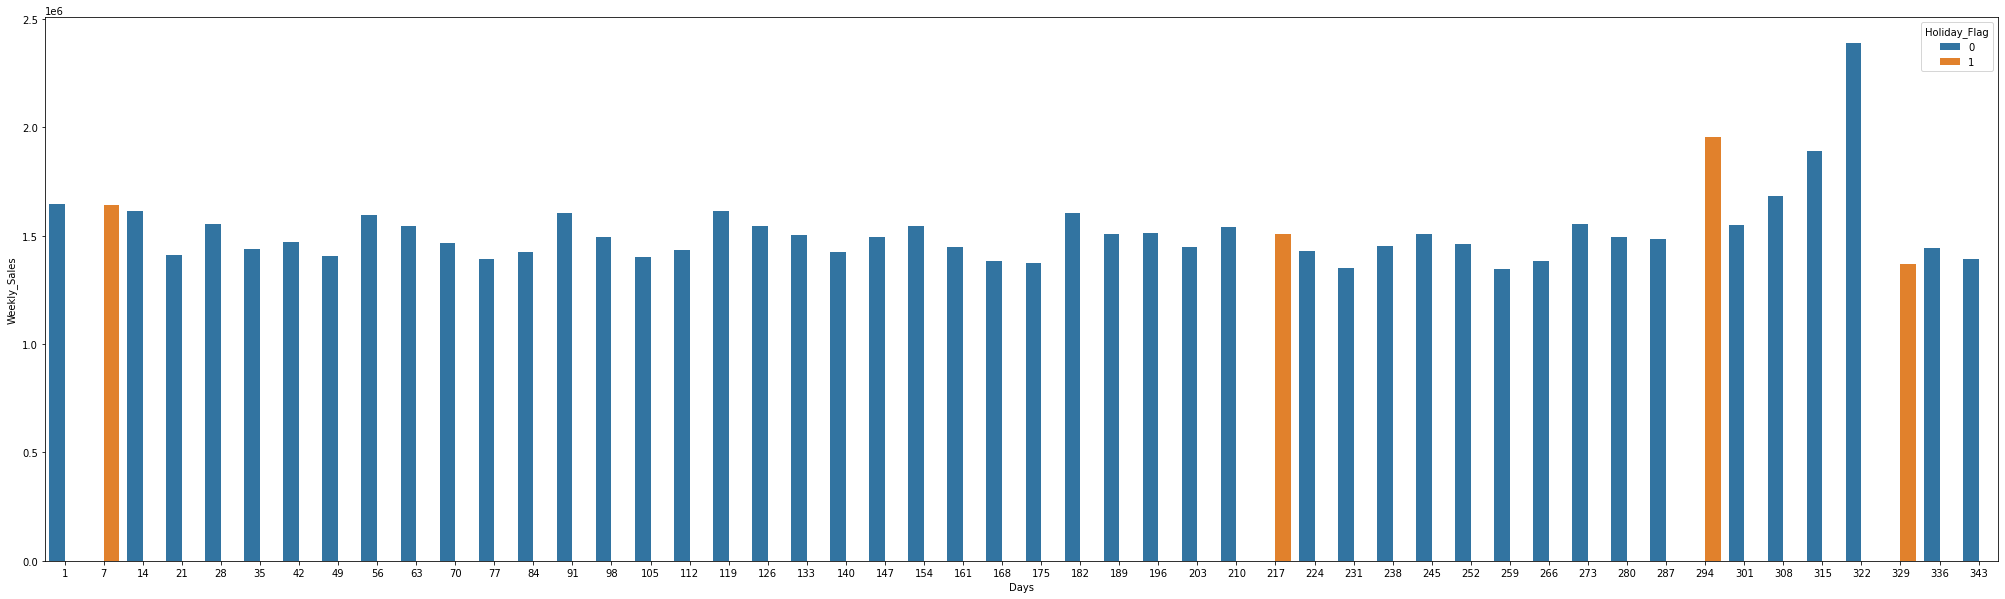

In [51]:
plt.figure(figsize=(35,10))
sns.barplot(x='Days', y = 'Weekly_Sales', data = factors.head(50), hue = 'Holiday_Flag')